In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gst_train_in=pd.read_csv('../../GSTN_project/Train_60/Train_60/X_Train_Data_Input.csv')
gst_train_out=pd.read_csv('../../GSTN_project/Train_60/Train_60/Y_Train_Data_Target.csv')

In [4]:
gst_train=pd.concat([gst_train_in,gst_train_out],axis=1)

In [5]:
gst_test_in=pd.read_csv('../../GSTN_project/Test_20/Test_20/X_Test_Data_Input.csv')
gst_test_out=pd.read_csv('../../GSTN_project/Test_20/Test_20/Y_Test_Data_Target.csv')


In [6]:
gst_test=pd.concat([gst_test_in,gst_test_out],axis=1)
gst_test.head(1)

ID  Column0  Column1  Column2   Column3  \
0  07cf2025382f6325b316e128b1b90999      1.0     1986     53.0  0.678139   

    Column4   Column5   Column6   Column7  Column8  ...  Column14  Column15  \
0  0.701403 -0.007469 -0.407939 -0.015607  0.55486  ...  0.001351   0.00339   

   Column16  Column17  Column18  Column19  Column20  Column21  \
0       0.0         0       0.0         0         0         0   

                                 ID  target  
0  07cf2025382f6325b316e128b1b90999       0  

[1 rows x 25 columns]

In [7]:
gst=pd.concat([gst_train,gst_test],axis=0)

In [8]:
gst1=gst.drop(columns=['ID','Column9'])

In [9]:
gst1['Column3']=gst1['Column3'].fillna(gst1['Column3'].quantile(0.50))
gst1['Column6']=gst1['Column6'].fillna(gst1['Column6'].quantile(0.50))
gst1['Column5']=gst1['Column5'].fillna(gst1['Column5'].quantile(0.50))

In [10]:
gst1['Column4']=gst1['Column4'].fillna(gst1['Column4'].mean())

In [11]:
gst1['Column8']=gst1['Column8'].fillna(gst1['Column8'].mean())

In [12]:
gst1['Column15']=gst1['Column15'].fillna(gst1['Column15'].median())

In [13]:
gst1=gst1.drop(columns='Column14')

In [14]:
gst1['Column0']=gst1['Column0'].fillna(gst1['Column0'].mode()[0])

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [16]:
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold

In [17]:
gst1.describe()

Column0       Column1       Column2       Column3       Column4  \
count  1.046845e+06  1.046845e+06  1.046845e+06  1.046845e+06  1.046845e+06   
mean   4.409841e-01  1.321704e+03  2.952551e+03  1.093432e-01 -1.798320e-05   
std    1.164504e+00  9.075232e+02  2.144206e+03  9.490568e-01  9.149944e-01   
min    0.000000e+00 -1.080000e+03 -5.700000e+01 -2.028572e+00 -1.855728e+00   
25%    0.000000e+00  5.140000e+02  1.130000e+03  1.461557e-03 -3.214492e-01   
50%    0.000000e+00  1.173000e+03  2.711000e+03  6.781394e-01  4.883092e-01   
75%    0.000000e+00  2.435000e+03  4.474000e+03  6.781394e-01  7.014035e-01   
max    1.800000e+01  2.501000e+03  1.029000e+04  6.781394e-01  7.014035e-01   

            Column5       Column6       Column7       Column8      Column10  \
count  1.046845e+06  1.046845e+06  1.046845e+06  1.046845e+06  1.046845e+06   
mean  -1.610242e-03 -1.697021e-03  4.300178e-04  7.669043e-07  2.404243e-01   
std    9.429206e-01  9.980818e-01  1.024444e+00  1.016793e+00  4.273414e-01   
min   -7.468650e-03 -4.079391e-01 -1.560743e-02 -7.749792e-01  0.000000e+00   
25%   -7.468650e-03 -4.079391e-01 -1.560743e-02 -7.749792e-01  0.000000e+00   
50%   -7.468650e-03 -4.079391e-01 -1.560743e-02  1.126848e-01  0.000000e+00   
75%   -7.467914e-03 -3.692890e-01 -1.560717e-02  6.230745e-01  0.000000e+00   
max    5.514211e+02  1.498582e+01  2.016879e+02  3.239925e+02  1.000000e+00   

       ...      Column12      Column13      Column15      Column16  \
count  ...  1.046845e+06  1.046845e+06  1.046845e+06  1.046845e+06   
mean   ...  3.628608e-01  3.279683e-01 -2.771389e-04  1.196930e-03   
std    ...  4.808254e-01  4.694734e-01  1.104060e+00  3.468631e-02   
min    ...  0.000000e+00  0.000000e+00 -1.091546e+03  0.000000e+00   
25%    ...  0.000000e+00  0.000000e+00  3.390099e-03  0.000000e+00   
50%    ...  0.000000e+00  0.000000e+00  3.390099e-03  0.000000e+00   
75%    ...  1.000000e+00  1.000000e+00  3.390099e-03  0.000000e+00   
max    ...  1.000000e+00  1.000000e+00  1.273565e-02  2.000000e+00   

           Column17      Column18      Column19      Column20      Column21  \
count  1.046845e+06  1.046845e+06  1.046845e+06  1.046845e+06  1.046845e+06   
mean   2.709236e-01  1.479579e-01  1.871242e-02  9.421643e-03  2.745392e-03   
std    3.188279e+00  4.311121e-01  1.355075e-01  9.660686e-02  5.232454e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    7.280000e+02  1.200000e+01  1.000000e+00  1.000000e+00  1.000000e+00   

             target  
count  1.046845e+06  
mean   9.429381e-02  
std    2.922372e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00  

[8 rows x 21 columns]

In [19]:
ss=StandardScaler()

In [20]:
gst1[['Column1','Column2','Column7']]=ss.fit_transform(gst1[['Column1','Column2','Column7']])

In [21]:
gst1[['Column17']]=ss.fit_transform(gst1[['Column17']])

In [22]:
gst1.head()

Column0   Column1   Column2   Column3   Column4   Column5   Column6  \
0      2.0  1.292856  0.360716  0.678139  0.701403 -0.007468  0.434190   
1      0.0  1.292856  0.233863  0.452580  0.701403 -0.007468  1.554998   
2      2.0  1.292856  0.741743 -1.577453 -1.429540 -0.007469 -0.407939   
3      0.0 -1.223886 -1.349475  0.678139 -0.000018 -0.007469 -0.407939   
4      0.0 -0.665222 -0.933936 -2.028572 -1.855728 -0.007469 -0.407939   

    Column7   Column8  Column10  ...  Column12  Column13  Column15  Column16  \
0 -0.015650  0.606265         0  ...         0         0   0.00339       0.0   
1 -0.015622  0.329946         0  ...         0         0   0.00339       0.0   
2 -0.015655 -0.774979         1  ...         1         1   0.00339       0.0   
3 -0.015655 -0.774979         0  ...         0         0   0.00339       0.0   
4 -0.015655 -0.774979         0  ...         0         0   0.00339       0.0   

   Column17  Column18  Column19  Column20  Column21  target  
0 -0.084975       0.0         0         0         0       0  
1 -0.084975       0.0         0         0         0       0  
2 -0.084975       0.0         0         0         0       0  
3 -0.084975       1.0         0         0         0       1  
4 -0.084975       0.0         0         0         0       0  

[5 rows x 21 columns]

In [23]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [24]:
X_=gst1.drop(columns='target')
y_=gst1['target']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X_,y_,test_size=0.2,random_state=15)

***MODEL TRAINING***

In [26]:
import xgboost as xgb
from xgboost import XGBClassifier

In [32]:
model_2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': [9],
    'n_estimators': [250],
    'learning_rate': [0.09],
    'gamma': [0.2],
    }
grid_search_1 = GridSearchCV(estimator=model_2, param_grid=param_grid, cv=skf, scoring='precision', verbose=1, n_jobs=-1)

In [33]:
grid_search_1.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


C:\Users\aayuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [18:49:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importan...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.2], 'learning_rate': [0.09],
                         'max_depth': [9], 'n_estimators': [250]},
             scoring='precision', verbose=1)

In [34]:
y_pred=grid_search_1.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
accuracy_score(y_test,y_pred)

0.9778333946286222

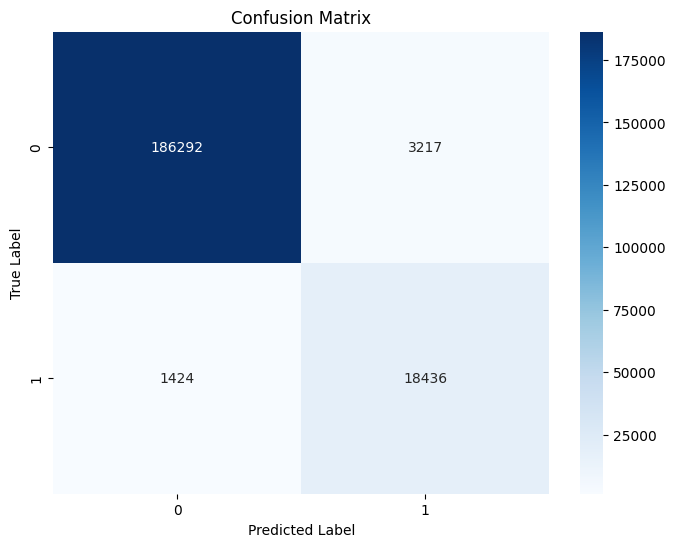

In [39]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from sklearn.pipeline import Pipeline

In [46]:
model_1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the RFE object, specifying the number of features you want to select
rfe = RFE(estimator=model_1, n_features_to_select=14)  # You can adjust n_features_to_select

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__max_depth': [9],
    'model__n_estimators': [250],
    'model__learning_rate': [0.09],
    'model__gamma': [0.2],
}

# Create a pipeline combining RFE and the model
pipeline = Pipeline([
    ('rfe', rfe),  # Apply RFE
    ('model', model_2)  # Then apply the model
])

# Define the StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=10)

# Set up the GridSearchCV
grid_search_2 = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=skf, scoring='precision', verbose=1, n_jobs=-1)


In [47]:
grid_search_2.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


C:\Users\aayuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aayuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aayuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('rfe',
                                        RFE(estimator=XGBClassifier(base_score=None,
                                                                    booster=None,
                                                                    callbacks=None,
                                                                    colsample_bylevel=None,
                                                                    colsample_bynode=None,
                                                                    colsample_bytree=None,
                                                                    device=None,
                                                                    early_stopping_rounds=None,
                                                                    enable_categorical=False,
                                                                    eval_metric='logloss',
                                                                    feature_types=N...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__gamma': [0.2], 'model__learning_rate': [0.09],
                         'model__max_depth': [9],
                         'model__n_estimators': [250]},
             scoring='precision', verbose=1)

In [48]:
y_pred=grid_search_2.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.9773462164885919

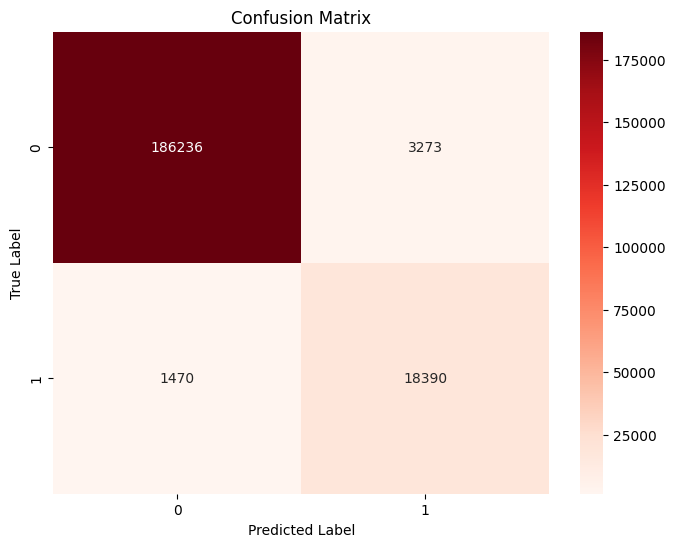

In [50]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from mpl_toolkits.mplot3d import Axes3D

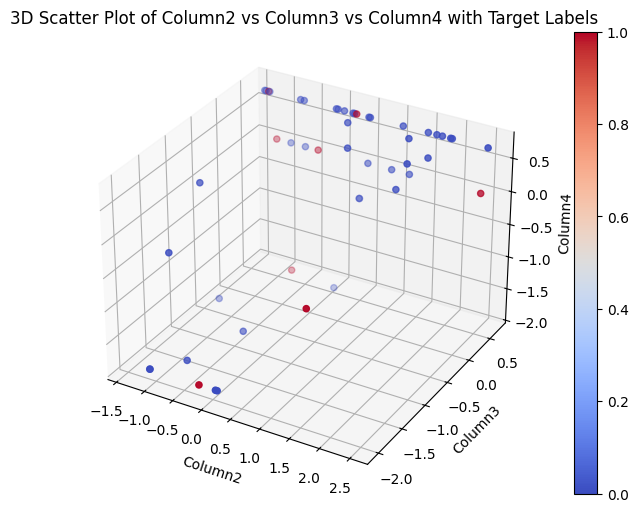

In [63]:
sample_data = gst1.sample(50)

# Set up the 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
sc = ax.scatter(sample_data['Column2'], sample_data['Column3'], sample_data['Column4'], c=sample_data['target'], cmap='coolwarm')

# Add a color bar which maps values to colors
plt.colorbar(sc)

# Add titles and labels
ax.set_title('3D Scatter Plot of Column2 vs Column3 vs Column4 with Target Labels')
ax.set_xlabel('Column2')
ax.set_ylabel('Column3')
ax.set_zlabel('Column4')

# Show the plot
plt.show()

In [64]:
y_pred_train=grid_search_2.predict(X_train)

In [68]:
accuracy_score(y_train,y_pred_train)

0.9810048287950939

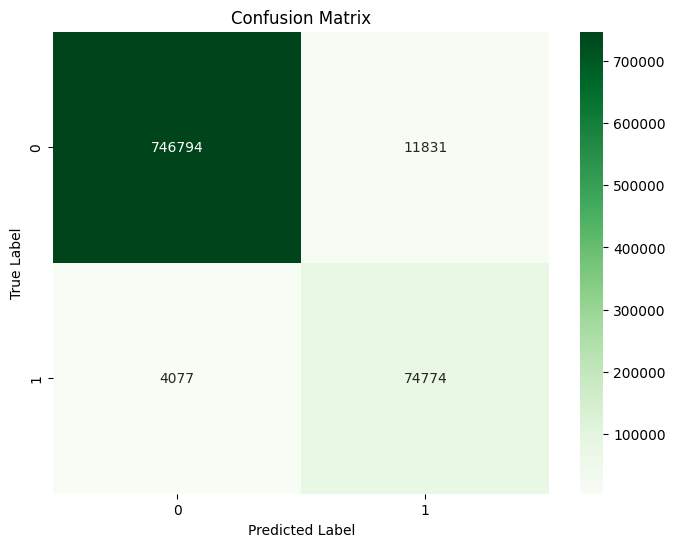

In [67]:
cm_t=confusion_matrix(y_train,y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_t, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [70]:
gst1[gst1['Column18']==0.0]['target'].value_counts()

target
0    910209
Name: count, dtype: int64

In [29]:
uni,cnt=np.unique(y_train,return_counts=True)


In [30]:
cnt

array([758625,  78851], dtype=int64)

***MODEL TRAINING AFTER t-SNE***

In [73]:
#in case of imbalanced datasets we have to look for overlapping points and find a way to separate them
#we will use t-SNE to reduce dimensionality

In [26]:
from sklearn.manifold import TSNE

In [34]:
tsne=TSNE(n_components=3,random_state=42)

In [29]:
!pip install imbalanced-learn


In [34]:
from sklearn.ensemble import IsolationForest
X_class_0=gst1[gst1['target']==0.0].drop(columns='target')

In [35]:
X_class_0.shape

(948134, 20)

In [40]:
iso_forest = IsolationForest(contamination=0.02)  
iso_forest.fit(X_class_0)  
anomalies = iso_forest.predict(X_class_0)

In [41]:
uni,cnt=np.unique(anomalies,return_counts=True)

In [42]:
uni

array([-1,  1])

In [43]:
cnt

array([ 18963, 929171], dtype=int64)

In [45]:
results = pd.DataFrame(X_class_0, columns=[f'Column{i}' for i in range(X_class_0.shape[1])])
results['Anomaly'] = anomalies

In [99]:
results=results.drop(columns=['Column9','Column14'])

In [96]:
df=X_class_0[['Column20','Column21']]

In [97]:
results=pd.concat([df,results],axis=1)

In [100]:
results.head()

Column20  Column21  Column0   Column1   Column2   Column3   Column4  \
0         0         0      2.0  1.292856  0.360716  0.678139  0.701403   
1         0         0      0.0  1.292856  0.233863  0.452580  0.701403   
2         0         0      2.0  1.292856  0.741743 -1.577453 -1.429540   
4         0         0      0.0 -0.665222 -0.933936 -2.028572 -1.855728   
5         0         0      0.0 -0.480103 -0.051558 -1.126335 -1.216445   

    Column5   Column6   Column7  ...  Column10  Column11  Column12  Column13  \
0 -0.007468  0.434190 -0.015650  ...         0         0         0         0   
1 -0.007468  1.554998 -0.015622  ...         0         0         0         0   
2 -0.007469 -0.407939 -0.015655  ...         1         1         1         1   
4 -0.007469 -0.407939 -0.015655  ...         0         0         0         0   
5 -0.007469 -0.407939 -0.015655  ...         1         1         1         1   

   Column15  Column16  Column17  Column18  Column19  Anomaly  
0   0.00339       0.0 -0.084975       0.0         0        1  
1   0.00339       0.0 -0.084975       0.0         0        1  
2   0.00339       0.0 -0.084975       0.0         0        1  
4   0.00339       0.0 -0.084975       0.0         0        1  
5   0.00339       0.0 -0.084975       0.0         0        1  

[5 rows x 21 columns]

In [53]:
feature1=results['Column2']

In [50]:
from sklearn.decomposition import PCA

In [54]:
feature2=results['Column3']

C:\Users\aayuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


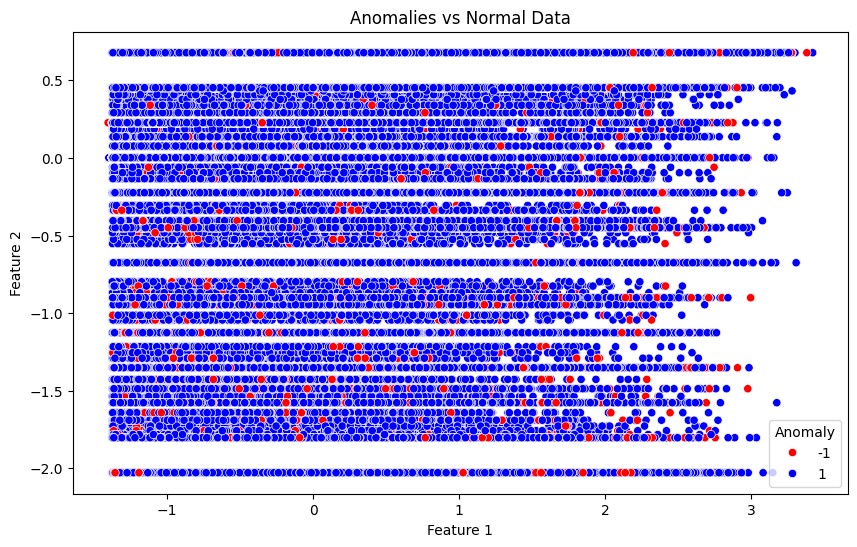

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Column2', y='Column3', hue='Anomaly', data=results, palette={1: 'blue', -1: 'red'})
plt.title('Anomalies vs Normal Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Anomaly')
plt.show()

In [101]:
result_ano=results[results['Anomaly']==-1].sample(10)

In [102]:
result_nor=results[results['Anomaly']==1].sample(50)

In [103]:
res=pd.concat([result_nor,result_ano],axis=0)

In [104]:
res.shape

(60, 21)

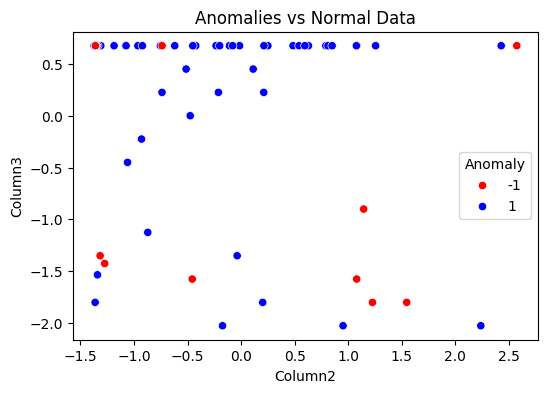

In [105]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Column2', y='Column3', hue='Anomaly', data=res, palette={1: 'blue', -1: 'red'})
plt.title('Anomalies vs Normal Data')
plt.xlabel('Column2')
plt.ylabel('Column3')
plt.legend(title='Anomaly')
plt.show()

In [90]:
X_class_0[(X_class_0['Column21']==0) & (X_class_0['Column20']==0) & (X_class_0['Column19']==0)].shape

(936924, 20)

In [91]:
X_class_0.shape

(948134, 20)